# Digit Recognizer (kaggle)

## Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

Method used: Classification with K-nearest neighbors

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/Thomas/Desktop/My Files/DSTI/Projects/Kaggle/all/train.csv')
test = pd.read_csv('C:/Users/Thomas/Desktop/My Files/DSTI/Projects/Kaggle/all/test.csv')

In [3]:
pd.isnull(train).any().describe()
pd.isnull(test).any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [4]:
y = train['label'].values
X = train.drop('label', axis=1).values
test_array = test.values

#NORMALIZE
X = X/255
test_array = test_array/255

#SEED FOR REPRODUCIBILITY
seed = np.random.seed(seed=2)

#SPLITTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=seed, stratify=y)

#CLASSIFIER
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
#SCORING THE MODEL
knn.score(X_test, y_test)

0.9669642857142857

In [6]:
#FIRST TEST
pred_1 = knn.predict(test_array[1:2])
print(pred_1)

[0]


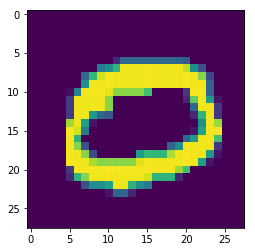

In [7]:
plt.imshow(test_array[1].reshape(28,28))

In [8]:
#SECOND TEST
pred_2 = knn.predict(test_array[10:11])
print(pred_2)

[5]


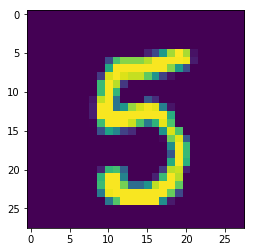

In [9]:
plt.imshow(test_array[10].reshape(28,28))